In [1]:
import os
os.chdir('D:\\Cognitior\\Courses\\Dataset\\Python DataScience\\')

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('data.csv')

In [4]:
dataset

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,27,48000,Yes
2,Germany,30,54000,No
3,Spain,45,61000,No
4,Germany,40,45000,Yes
5,France,35,58000,Yes
6,Spain,39,52000,No
7,France,48,79000,Yes
8,Germany,50,83000,No
9,France,37,67000,Yes


In [13]:
x=dataset.iloc[:,:-1].values

In [16]:
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])

In [18]:
onehotencoder = OneHotEncoder(categorical_features=[0])
x = onehotencoder.fit_transform(x).toarray()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [20]:
pd.DataFrame(x)

,0,1,2,3,4
0,1.0,0.0,0.0,44.0,72000.0
1,0.0,0.0,1.0,27.0,48000.0
2,0.0,1.0,0.0,30.0,54000.0
3,0.0,0.0,1.0,45.0,61000.0
4,0.0,1.0,0.0,40.0,45000.0
5,1.0,0.0,0.0,35.0,58000.0
6,0.0,0.0,1.0,39.0,52000.0
7,1.0,0.0,0.0,48.0,79000.0
8,0.0,1.0,0.0,50.0,83000.0
9,1.0,0.0,0.0,37.0,67000.0


In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [23]:
pd.DataFrame(x)

,0,1,2,3,4
0,1.224745,-0.654654,-0.654654,0.632299,0.818976
1,-0.816497,-0.654654,1.527525,-1.756387,-1.127105
2,-0.816497,1.527525,-0.654654,-1.334854,-0.640585
3,-0.816497,-0.654654,1.527525,0.772810,-0.072978
4,-0.816497,1.527525,-0.654654,0.070255,-1.370365
5,1.224745,-0.654654,-0.654654,-0.632299,-0.316238
6,-0.816497,-0.654654,1.527525,-0.070255,-0.802758
7,1.224745,-0.654654,-0.654654,1.194343,1.386583
8,-0.816497,1.527525,-0.654654,1.475365,1.710930
9,1.224745,-0.654654,-0.654654,-0.351277,0.413542


In [24]:
from sklearn.preprocessing import Normalizer
nm_x = Normalizer()
x = nm_x.fit_transform(x)

In [25]:
os.chdir('D:\\Cognitior\\Courses\\Data Science - Course - Reusable component\\Outlier Treatment\\')

In [26]:
dataseto = pd.read_excel('OutlierData.xlsx')

In [36]:
dataseto=dataseto.iloc[:,1:3]

In [37]:
dataseto

,Age,Experience
0,21,1
1,33,12
2,35,12
3,36,12
4,34,11
5,33,13
6,34,12
7,32,10
8,31,2
9,55,35


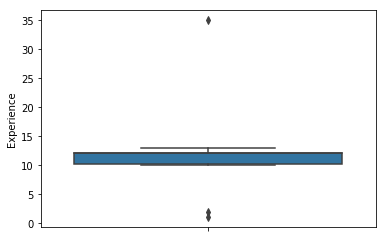

In [30]:
import seaborn as sns
sns.boxplot(y='Experience', data=dataseto)

In [38]:
dataset_out = dataseto[~((dataseto<(Q1-1.5*IQR))
                       | (dataseto>(Q3+1.5*IQR))).any(axis=1)]

In [39]:
dataset_out 

,Age,Experience
1,33,12
2,35,12
3,36,12
4,34,11
5,33,13
6,34,12
7,32,10


In [32]:
Q1 = dataseto.quantile(0.25)
Q3 = dataseto.quantile(0.75)
IQR = Q3-Q1